<a href="https://colab.research.google.com/github/de-saksham/COVID-2019/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading Datasets

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_excel('cases_in_india.xlsx')
df

,S. No.,State,Confirmed,Recovered,Death
0,1,Andhra Pradesh,190,1,1
1,2,Andaman and Nicobar Islands,10,0,0
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,26,0,0
4,5,Bihar,30,0,1
5,6,Chandigarh,18,0,0
6,7,Chhattisgarh,9,3,0
7,8,Delhi,503,18,7
8,9,Goa,7,0,0
9,10,Gujarat,122,18,11


Reading Data - Day Wise : India, Italy, USA & Wuhan


In [7]:
#Day Wise : India, Italy, USA & Wuhan
India = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
USA = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="USA")
Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="China")

print(Italy.head())

        Date  Total Case  ...  Recovered  Days after surpassing 100 cases
0 2020-01-30           2  ...          0                              NaN
1 2020-01-31           2  ...          0                              NaN
2 2020-02-01           2  ...          0                              NaN
3 2020-02-02           2  ...          0                              NaN
4 2020-02-03           2  ...          0                              NaN

[5 rows x 7 columns]


In [8]:
#Total case is the total number of confirmed cases (Indian National + Foreign National)
from datetime import datetime

df['Total cases'] = df['Confirmed']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India:', total_cases, 'as of', datetime.now())

df['Total Recovered'] = df['Recovered']
total_death = df['Recovered'].sum()
print('Total Recovered from COVID-19 cases across India:', total_death, 'as of', datetime.now() )

df['Total Death'] = df['Death']
total_death = df['Death'].sum()
print('Total Death from COVID-19 cases across India:', total_death, 'as of', datetime.now() )


Total number of confirmed COVID 2019 cases across India: 3577 as of 2020-04-06 08:53:49.056342
Total Recovered from COVID-19 cases across India: 275 as of 2020-04-06 08:53:49.059236
Total Death from COVID-19 cases across India: 83 as of 2020-04-06 08:53:49.061500


In [4]:
df.drop(['S. No.','Total cases', 'Total Death', 'Total Recovered'], axis=1, inplace=True)
df.style.background_gradient(cmap='Oranges')

,State,Confirmed,Recovered,Death
0,Andhra Pradesh,190,1,1
1,Andaman and Nicobar Islands,10,0,0
2,Arunachal Pradesh,1,0,0
3,Assam,26,0,0
4,Bihar,30,0,1
5,Chandigarh,18,0,0
6,Chhattisgarh,9,3,0
7,Delhi,503,18,7
8,Goa,7,0,0
9,Gujarat,122,18,11


In [9]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Recovered'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active, 'as of', datetime.now())
Tot_Cases = df.groupby('State')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 3219 as of 2020-04-06 08:53:53.056189


,Total Active
State,
Delhi,478
Tamil Nadu,476
Maharashtra,424
Kerala,255
Telengana,230
Uttar Pradesh,206
Andhra Pradesh,188
Rajasthan,179
Madhya Pradesh,156


In [0]:
import plotly
plotly.io.renderers.default = 'colab'

In [12]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=India['Date'], y = India['Total Case'], mode='lines+markers',name='India'))
fig.update_layout(title_text='Trend of Covid-19 Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Daily Reported Cases in India

import plotly.express as px
fig = px.bar(India, x="Date", y="Daily Cases", barmode='group', height=400)
fig.update_layout(title_text='Covid-19 Cases in India - Daily Cases',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [13]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=India['Date'], y = India['Total Case'], mode='lines+markers',name='India'))
fig.add_trace(go.Scatter(x=Italy['Date'], y = Italy['Total Case'], mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=Wuhan['Date'], y = Wuhan['Total Case'], mode='lines+markers',name='Wuhan - China'))
fig.update_layout(title_text='Trend of Covid-19 Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

confirmed_cases = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
recovered_cases = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
deaths_reported = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

In [0]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10


In [0]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2


In [0]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2


In [18]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

In [19]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
recovered = recovered_cases.loc[:,cols[4]:cols[-1]]
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]

confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14


In [0]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


In [0]:
# convert all the dates and cases to numpy array

day_since_start = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [0]:
# future prediction for next 14 days

predict_days = 14
forecast = np.array([i for i in range(len(dates)+predict_days)]).reshape(-1,1)
final_dates = forecast[:-10]

In [0]:
# Convert all the integers into datetime

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
forecast_dates = []
for i in range(len(forecast)):
  forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [0]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_recovered = recovered_cases[dates[-1]]
latest_death = deaths_reported[dates[-1]]


In [0]:
distinct_countries = list(confirmed_cases['Country/Region'].unique())


               Total Case  Daily Cases
Total Case                            
(0, 1000]      112.983051    16.728814
(1000, 2000]  1417.500000   252.750000
(2000, 3000]  2555.000000   284.500000
(3000, 4000]  3335.000000   510.500000


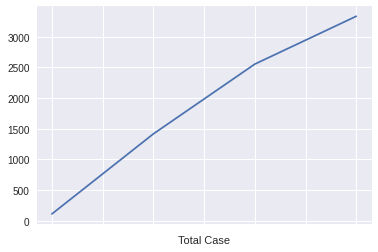

In [26]:
#Multiple Regression

%matplotlib inline
import pandas as pd
import numpy as np 
total_cases_india = df['Total cases'].sum()
df1 = India[['Total Case','Daily Cases']]
bins = np.arange(0,5000,1000)
groups = df1.groupby(pd.cut(df1['Total Case'],bins)).mean()
print(groups.head())
groups['Total Case'].plot.line()




In [27]:
#Prediction Model for Deaths in India from Covid-19

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = India[['Total Case', 'Daily Cases', 'Recovered']]
y = India['Deaths']

X[['Total Case', 'Daily Cases', 'Recovered']] = scale.fit_transform(X[['Total Case', 'Daily Cases', 'Recovered']])
print(X)

est = sm.OLS(y, X).fit()
est.summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



    Total Case  Daily Cases  Recovered
0    -0.470258    -0.401610  -0.498728
1    -0.470258    -0.409252  -0.498728
2    -0.470258    -0.409252  -0.498728
3    -0.468948    -0.401610  -0.498728
4    -0.467638    -0.401610  -0.498728
..         ...          ...        ...
62    2.146070     4.183651   2.175899
63    2.860090     3.755694   2.952987
64    2.891533    -0.225841   2.971059
65    3.566249     3.526431   3.639715
66    4.229175     3.457652   3.639715

[67 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Deaths   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              111.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                    2.55e-25
Time:                        08:55:20   Log-Likelihood:                         -244.31
No. Observations:                  67   AIC:                                      494.6
Df Residuals:                      64   BIC:                                      501.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Total Case     21.7816     10.792      2.018      0.048       0.222      43.341
Daily Cases     0.3619      2.355      0.154      0.878      -4.343       5.067
Recovered      -0.9415     10.393     -0.091      0.928     -21.704      19.821
==============================================================================
Omnibus:                       31.387   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.981
Skew:                          -1.699   Prob(JB):                     4.23e-13
Kurtosis:                       5.978   Cond. No.                         21.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y.groupby(India.Deaths).mean()

Deaths
0      0
1      1
2      2
3      3
4      4
5      5
7      7
10    10
12    12
20    20
24    24
27    27
32    32
35    35
58    58
72    72
86    86
99    99
Name: Deaths, dtype: int64

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

scaled = scale.transform([[10000, 700, 400]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[12.62972211  4.94021943  6.72999386]]
[270.5472876]


In [30]:
#Prediction Model for Deaths in Italy from Covid-19

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaleItaly = StandardScaler()

X = Italy[['Total Case', 'Daily Cases', 'Recovered', 'Active']]
y = Italy['Deaths']

X[['Total Case', 'Daily Cases', 'Recovered', 'Active']] = scaleItaly.fit_transform(X[['Total Case', 'Daily Cases', 'Recovered','Active']])
print(X)

est = sm.OLS(y, X).fit()
est.summary()

    Total Case  Daily Cases  Recovered    Active
0    -0.675641    -0.833766  -0.589571 -0.699076
1    -0.675641    -0.834637  -0.589571 -0.699076
2    -0.675641    -0.834637  -0.589571 -0.699076
3    -0.675641    -0.834637  -0.589571 -0.699076
4    -0.675641    -0.834637  -0.589571 -0.699076
..         ...          ...        ...       ...
60    2.087773     0.929604   2.203410  2.035487
61    2.212687     1.246932   2.415271  2.132940
62    2.334623     1.197309   2.628852  2.229947
63    2.454391     1.161180   2.902228  2.312212
64    2.579906     1.256944   3.184965  2.400146

[65 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Deaths   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.724
Method:                 Least Squares   F-statistic:                              43.64
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                    2.99e-17
Time:                        08:55:31   Log-Likelihood:                         -599.08
No. Observations:                  65   AIC:                                      1206.
Df Residuals:                      61   BIC:                                      1215.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Total Case   3.828e+04   1.03e+05      0.371      0.712   -1.68e+05    2.44e+05
Daily Cases -6.685e-11   1518.502   -4.4e-14      1.000   -3036.432    3036.432
Recovered   -5234.5514   2.21e+04     -0.237      0.813   -4.94e+04    3.89e+04
Active       -2.91e+04   8.25e+04     -0.353      0.726   -1.94e+05    1.36e+05
==============================================================================
Omnibus:                       10.870   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.889
Skew:                          -1.047   Prob(JB):                      0.00262
Kurtosis:                       3.078   Cond. No.                         828.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[[1.87610873 1.43628451 1.77624803 1.88776133]]
[7587.92307692]


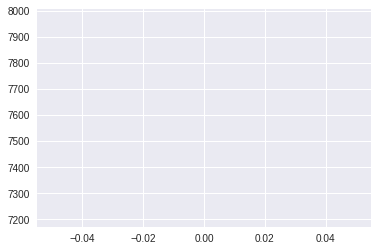

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

scaled = scaleItaly.transform([[97689, 5217, 12384, 75282]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)
plt.plot(predicted)
plt.show()

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
dataset = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexDataSet = dataset.set_index(['Date'])

In [39]:
from datetime import datetime
indexDataSet.head(10)

,Total Case,Daily Cases,Deaths,Active,Recovered,Days after surpassing 100 cases
Date,,,,,,
2020-01-30,1,1,0,1,0,NaN
2020-01-31,1,0,0,1,0,NaN
2020-02-01,1,0,0,1,0,NaN
2020-02-02,2,1,0,2,0,NaN
2020-02-03,3,1,0,3,0,NaN
2020-02-04,3,0,0,3,0,NaN
2020-02-05,3,0,0,3,0,NaN
2020-02-06,3,0,0,3,0,NaN
2020-02-07,3,0,0,3,0,NaN


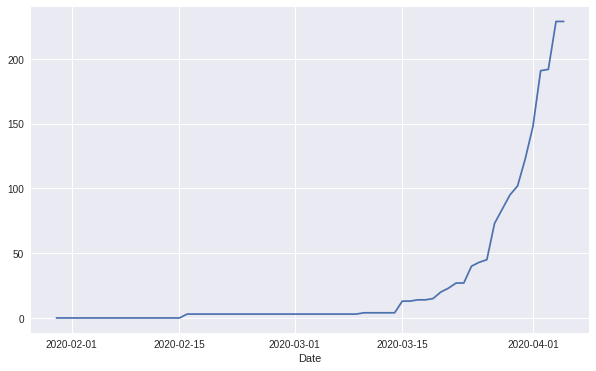

In [43]:
plt.xlabel('Date')
plt.ylabel('')
plt.plot(indexDataSet.Recovered)

In [44]:
rolmean = indexDataSet.rolling(window=12).mean()
rolstd = indexDataSet.rolling(window=12).std()
print(rolmean, rolstd)

             Total Case  ...  Days after surpassing 100 cases
Date                     ...                                 
2020-01-30          NaN  ...                              NaN
2020-01-31          NaN  ...                              NaN
2020-02-01          NaN  ...                              NaN
2020-02-02          NaN  ...                              NaN
2020-02-03          NaN  ...                              NaN
...                 ...  ...                              ...
2020-04-01   890.750000  ...                             13.5
2020-04-02  1075.166667  ...                             14.5
2020-04-03  1256.083333  ...                             15.5
2020-04-04  1471.333333  ...                             16.5
2020-04-05  1725.666667  ...                             17.5

[67 rows x 6 columns]             Total Case  Daily Cases  ...  Recovered  Days after surpassing 100 cases
Date                                 ...                                            
2

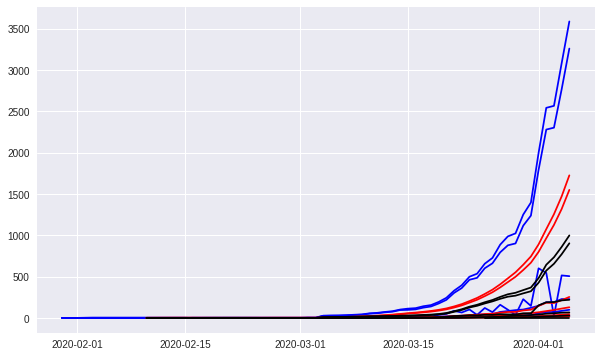

In [48]:
orig = plt.plot(indexDataSet, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='ROlling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.show(block=False)

In [50]:
from statsmodels.tsa.stattools import adfuller

print('Result')
dftest = adfuller(indexDataSet['Total Case'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#lags Used', 'NUmber of Observations Used' ])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Result
Test Statistics                 7.394156
p-value                         1.000000
#lags Used                      9.000000
NUmber of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



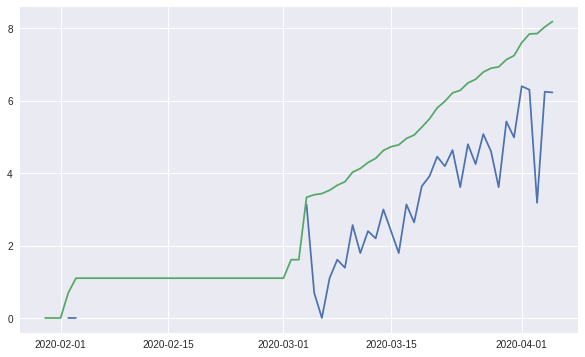

In [78]:
indexDataSet_logScale = np.log(indexDataSet[['Daily Cases', 'Total Case']])
plt.plot(indexDataSet_logScale)

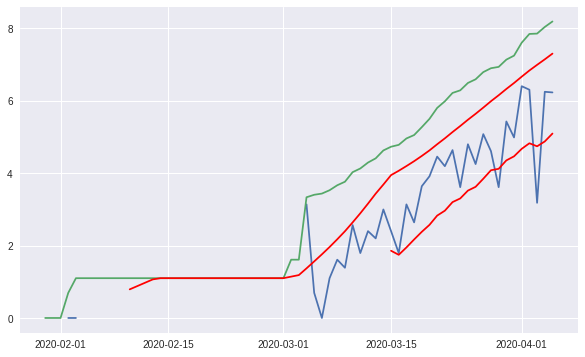

In [79]:
movAvg = indexDataSet_logScale.rolling(window=12).mean()
movStd = indexDataSet_logScale.rolling(window=12).std()
plt.plot(indexDataSet_logScale)
plt.plot(movAvg, color='red')

In [80]:
datasetLogScaleMinusMovAvg = indexDataSet_logScale - movAvg
datasetLogScaleMinusMovAvg.head(12)

datasetLogScaleMinusMovAvg.dropna(inplace=True)
datasetLogScaleMinusMovAvg.head(10)

,Daily Cases,Total Case
Date,,
2020-03-15,0.542192,0.784010
2020-03-16,0.048034,0.715169
2020-03-17,1.188240,0.762320
2020-03-18,0.471881,0.721693
2020-03-19,1.258829,0.794571
2020-03-20,1.341384,0.871080
2020-03-21,1.628037,1.003180
2020-03-22,1.227952,1.022496
2020-03-23,1.436112,1.079899


In [81]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

   movAvg = timeseries.rolling(window=10).mean()
   movStd = timeseries.rolling(window=10).std()

   orig = plt.plot(timeseries, color ='blue', label='Original')
   mean = plt.plot(movAvg, color='Red', label='Rolling Mean')
   std = plt.plot(movStd, color='Green', label='Rolling Std')
   plt.show()

   print('Result')
   dftest1 = adfuller(timeseries['Total Case'], autolag='AIC')
   dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#lags Used', 'Nmber of Observations Used' ])
   for key, value in dftest1[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)


Test Statistics                 7.394156
p-value                         1.000000
#lags Used                      9.000000
NUmber of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
